# Bab Perkenalan
Nama : Praduta Firman Anugrah 

Batch : 002 Full Time Data Science

Tujuan Program :

Pada program ini akan dilakukan Linear Regression pada Model Inference yang akan dibuat.

Dataset : Dataset yang digunakan adalah Uber vs Lyft yang berisi mengenai data penumpang 2 perusahaan ride sharing, Uber dan Lyft, di Boston, Amerika Serikat. Data ini berisi informasi mengenai tempat asal, tujuan, tanggal penggunaan jasa ride sharing ini serta informasi mengenai cuaca saat itu.

Sumber Dataset : https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

#  Import Pustaka

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Loading

In [4]:
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
df.shape

(693071, 57)

In [6]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

# Data Preprocessing

In [7]:
cols_to_use = ['hour', 'source', 'destination', 'cab_type', 'name', 'distance', 'price']
df = df[cols_to_use]
df.head()

,hour,source,destination,cab_type,name,distance,price
0,9,Haymarket Square,North Station,Lyft,Shared,0.44,5.0
1,2,Haymarket Square,North Station,Lyft,Lux,0.44,11.0
2,1,Haymarket Square,North Station,Lyft,Lyft,0.44,7.0
3,4,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,26.0
4,3,Haymarket Square,North Station,Lyft,Lyft XL,0.44,9.0


# Explorasi Data

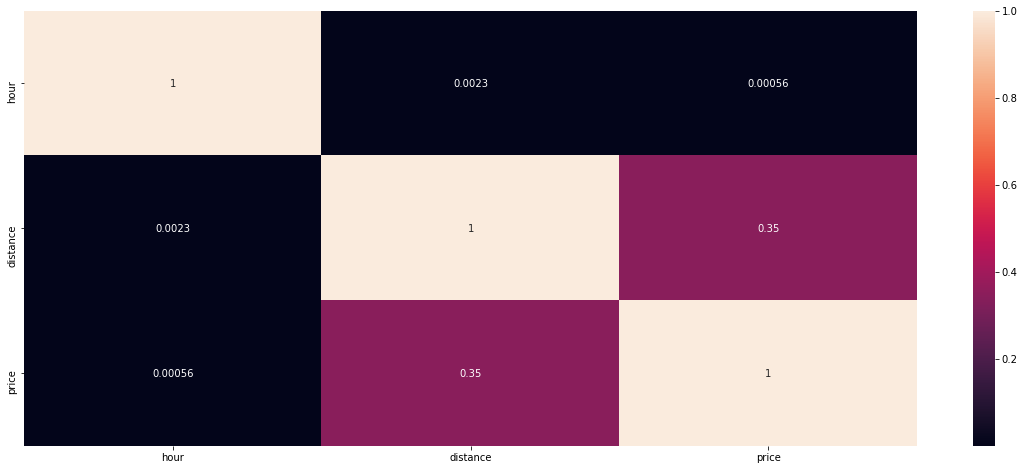

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True);

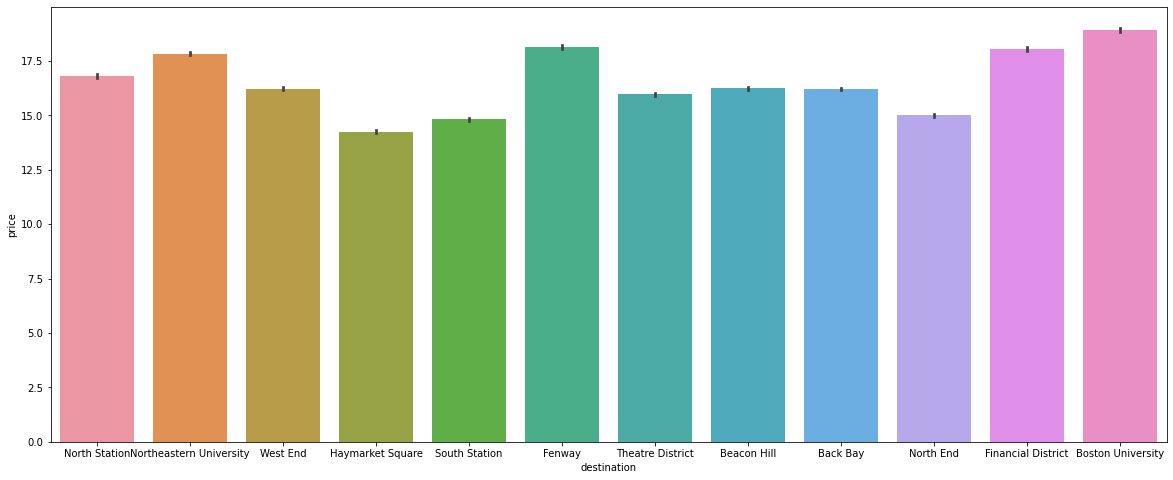

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x='destination',y='price',data=df);

In [12]:
df[df['destination'] == 'Boston University']['price'].mean()

18.942136691053392

In [13]:
df[df['destination'] == 'Financial District']['price'].mean()

18.046279893711247

In [14]:
df[df['destination'] == 'Fenway']['price'].mean()

18.146418763871647

Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk tempat tujuan dari Boston University, Fenway dan Financial District.

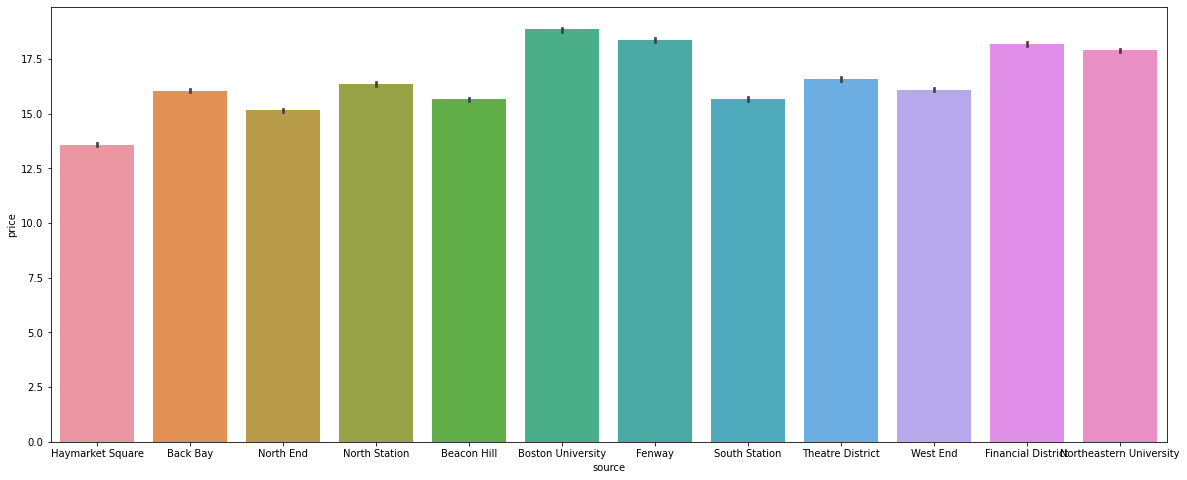

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x='source',y='price',data=df);

In [16]:
df[df['source'] == 'Boston University']['price'].mean()

18.85303355149327

In [17]:
df[df['source'] == 'Fenway']['price'].mean()

18.3794906519204

In [18]:
df[df['source'] == 'Financial District']['price'].mean()

18.181371662638153

Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk keberangkatan dari Boston University, Fenway dan Financial District.

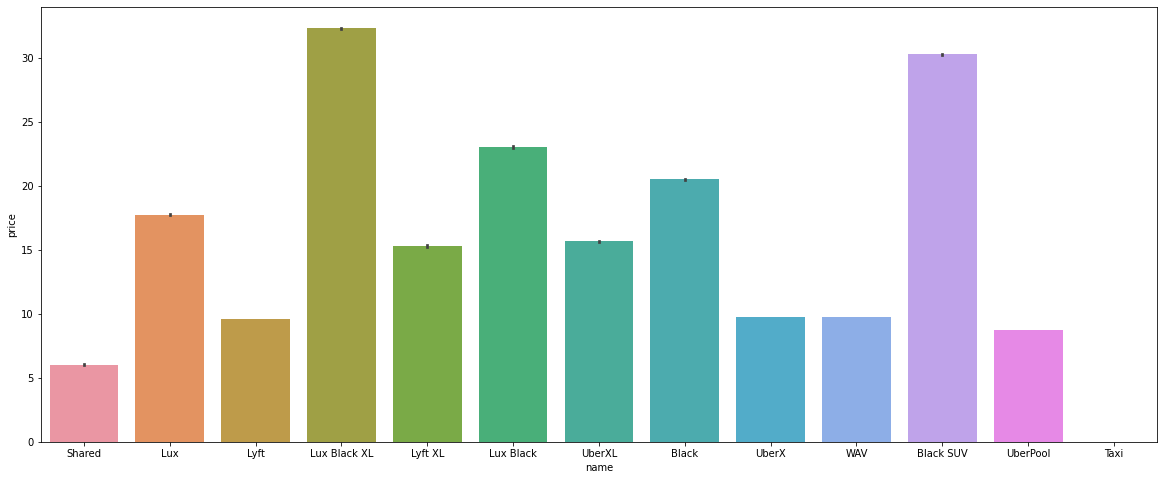

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(x='name',y='price',data=df);

In [20]:
df[df['name'] == 'Black SUV']['price'].mean()

30.286763104399594

In [21]:
df[df['name'] == 'Lux Black XL']['price'].mean()

32.32408607397287

Dari hasil visualisasi bahwa price rata - rata tertinggi adalah Black SUV dan Lux Black XL.

In [36]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,hour,distance,price,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,0.44,5.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.44,11.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0.44,7.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0.44,26.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,0.44,9.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Data Cleaning

In [37]:
df.shape

(637976, 37)

In [7]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
df.dropna(inplace=True)
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Melakukan proses menghapus rows dalam mengatasi missing values variabel price.

# Pendefinisian Model

REGRESI LINEAR

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [41]:
X = df.drop(['price'], axis=1)
y = df['price']

Menggunakan model Regression karena objektifnya adalah melakukan prediksi terhadap variabel price.

# Pelatihan Model

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

In [44]:
linear_reg = LinearRegression(fit_intercept=True)

%time linear_reg.fit(X_train_trf, y_train)

Wall time: 697 ms


LinearRegression()

In [45]:
lasso_reg = linear_model.Lasso(alpha=0.001, max_iter=100, tol=0.01)

%time lasso_reg.fit(X_train_trf, y_train)

Wall time: 2.42 s


Lasso(alpha=0.001, max_iter=100, tol=0.01)

In [46]:
ridge_reg = Ridge(alpha=0.1, max_iter=1000, tol=0.001)

%time ridge_reg.fit(X_train_trf, y_train)

Wall time: 263 ms


Ridge(alpha=0.1, max_iter=1000)

# Evaluasi Model

In [47]:
X_val_trf = scaler.transform(X_val)

Regresi Linear

In [48]:
%time y_preds = linear_reg.predict(X_val_trf)

Wall time: 24 ms


In [49]:
linear_reg.score(X_val_trf, y_val)

0.8941226645709955

In [50]:
linear_reg.score(X_train_trf, y_train)

0.8948201938307598

In [51]:
R2_score_lin = r2_score(y_val, y_preds)
print(f'R2_score : {R2_score_lin: .2f}')

MAE = mean_absolute_error(y_val, y_preds)
print(f'MAE: {MAE:.2f}')

MSE = mean_squared_error(y_val, y_preds)
print(f'MSE: {MSE:.2f}') 

RMSE = np.sqrt(mean_squared_error(y_val, y_preds))
print(f'RMSE: {RMSE:.2f}')

R2_score :  0.89
MAE: 1.93
MSE: 9.24
RMSE: 3.04


Lasso Regression

In [52]:
%time y_preds_lasso = lasso_reg.predict(X_val_trf)

Wall time: 25 ms


In [53]:
lasso_reg.score(X_val_trf, y_val)

0.8941184028749916

In [54]:
lasso_reg.score(X_train_trf, y_train)

0.8948190941027814

In [55]:
R2_score_lasso = r2_score(y_val, y_preds_lasso)
print(f'R2_score : {R2_score_lasso: .2f}')

MAE_lasso = mean_absolute_error(y_val, y_preds_lasso)
print(f'MAE_lasso: {MAE_lasso:.2f}')

MSE_lasso = mean_squared_error(y_val, y_preds_lasso)
print(f'MSE_lasso: {MSE_lasso:.2f}') 

RMSE_lasso = np.sqrt(mean_squared_error(y_val, y_preds_lasso))
print(f'RMSE_lasso: {RMSE_lasso:.2f}')

R2_score :  0.89
MAE_lasso: 1.93
MSE_lasso: 9.24
RMSE_lasso: 3.04


Ridge Regression

In [56]:
%time y_preds_ridge = ridge_reg.predict(X_val_trf)

Wall time: 25 ms


In [57]:
ridge_reg.score(X_val_trf, y_val)

0.8941227131309657

In [58]:
ridge_reg.score(X_train_trf, y_train)

0.8948202171541643

In [59]:
R2_score_ridge = r2_score(y_val, y_preds_ridge)
print(f'R2_score : {R2_score_ridge: .2f}')

MAE_ridge = mean_absolute_error(y_val, y_preds_ridge)
print(f'MAE_ridge: {MAE_ridge:.2f}')

MSE_ridge = mean_squared_error(y_val, y_preds_ridge)
print(f'MSE_ridge: {MSE_ridge:.2f}') 

RMSE_ridge = np.sqrt(mean_squared_error(y_val, y_preds_ridge))
print(f'RMSE_ridge: {RMSE_ridge:.2f}')

R2_score :  0.89
MAE_ridge: 1.93
MSE_ridge: 9.24
RMSE_ridge: 3.04


In [60]:
model = pd.Series(['Linear Regression', 'Lasso', 'Ridge'])

In [61]:
R2_score = pd.Series([R2_score_lin, R2_score_lasso, R2_score_ridge ])
MAE_score = pd.Series([MAE, MAE_lasso, MAE_ridge ])
MSE_score = pd.Series([MSE, MSE_lasso, MSE_ridge ])
RMSE_score = pd.Series([RMSE, RMSE_lasso, RMSE_ridge ])

In [62]:
choose_regression = car_data = pd.DataFrame({'Regression': model, 'R2_score': R2_score, 'MAE_score': MAE_score, 'MSE_score': MSE_score, 'RMSE_score': RMSE_score})
choose_regression

,Regression,R2_score,MAE_score,MSE_score,RMSE_score
0,Linear Regression,0.894123,1.928675,9.236493,3.039160
1,Lasso,0.894118,1.928479,9.236865,3.039221
2,Ridge,0.894123,1.928649,9.236489,3.039159


# Model Inference

In [71]:
y_preds_val = ridge_reg.predict(X_val_trf)
y_preds_val

array([12.56347234, 11.28822169,  6.72333873, ..., 18.02313534,
        9.3594871 ,  7.14531535])

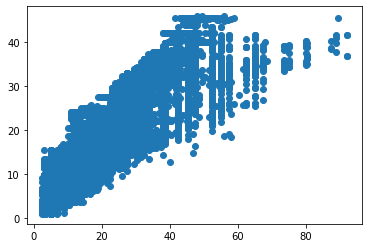

In [68]:
plt.scatter(y_val,y_preds_val);

# Kesimpulan

Model Analisis

In [72]:
params = pd.Series(ridge_reg.coef_, index=X.columns)

In [73]:
analysis = pd.DataFrame(params.round(0),X.columns,columns=['Coeff'])
analysis

,Coeff
hour,-0.0
distance,3.0
source_Beacon Hill,-0.0
source_Boston University,-0.0
source_Fenway,-0.0
source_Financial District,0.0
source_Haymarket Square,0.0
source_North End,0.0
source_North Station,-0.0
source_Northeastern University,-0.0


Model Analysis :

Dengan menggunakan Model Ridge Regression terdapat beberapa variabel yang memiliki relasi positif terhadap variabel price, yaitu:

- Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit variabel distance dikaitkan dengan peningkatan total 3 unit variabel price.

- Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit variabel cab_type_Uber dikaitkan dengan peningkatan total 1 unit variabel price.

- Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit variabel name_Black SUV dikaitkan dengan peningkatan total 3 unit variabel price.

- Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit variabel name_Lux Black dikaitkan dengan peningkatan total 1 unit variabel price.

- Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit variabel name_Lux Black XL dikaitkan dengan peningkatan total 4 unit variabel price.

Overall Analysisis :

Setelah di scale:
- Mean Squared Error: 241,39

- Score Akurasi: -1,390

- Mean Absolute Error: 15,153

- Error setelah diprediksi: 15,537

Setelah ini di scale, X memiliki tipedata numpy.ndarray, lalu dilakukan linier regresi dan hasilnya negatif, dengan error agak sedikit banyak, sebenernya ndarray ini tidak cocok dilakukan linier regresi

Model yang dibuat sudah dapat memprediksi harga berdasarkan data-data yang disediakan. Namun, kebanyakan masih meleset bila nilai price terlalu tinggi.

Predicted price ini menurun dan berhenti di angka 40 dan tidak dapat menyentuh angka maksimal dari Predictor Price yaitu 80, tidak dapat menyentuh angka setelahnya sedangkan dari Predictor Price yaitu ada yang > 40 yang tidak terprediksi, dengan skor -1 bahwa predictor skor tidak terlalu cukup akurat.